# Movie Review Classification

The **goal** of this project is to make a model which can predict the *sentiment* of a movie review (positive or negative). For this purpose, NLP techniques are being used, along with the *Logistic Regression* classification algorithm.

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Word Cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Get the data

For this project, i'll be using a dataset from the IMDB.

The dataset contains a collection of 50 thousand Movie Reviews along with their sentiment (positive or negative).

In [3]:
text = pd.read_csv('data/IMDB+Dataset.csv')
text.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## EDA

In [4]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
text['sentiment'].value_counts() #balanced dataset

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [6]:
text.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  Nickelodeon has gone down the toilet. They hav...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [7]:
# Display a single message
text.iloc[3][0]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

### Most frequent words in the positive reviews

In [8]:
stopwords_l = stopwords.words('english')
stopwords_l.append('br')

In [9]:
positive_reviews = text[text['sentiment']=='positive']
positive_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [10]:
pos = []
for rev in positive_reviews['review']:
    pos.append(rev)

pos = ''.join(pos) # Concatenate all the positive reviews into a single string

(-0.5, 399.5, 199.5, -0.5)

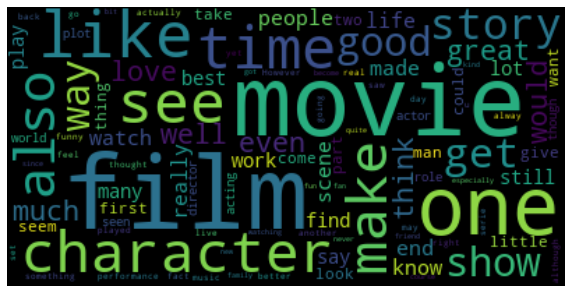

In [11]:
wordcloud_positive = WordCloud(stopwords=stopwords_l,max_words=100,min_font_size=4).generate(pos)

# Display the top words for positive reviews
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_positive,interpolation='bilinear')
plt.axis('off')

### Most frequent words in the negative reviews

In [12]:
negative_reviews = text[text['sentiment']=='negative']
negative_reviews.head()

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative


In [13]:
neg = []
for rev in negative_reviews['review']:
    neg.append(rev)
    
neg = ''.join(neg) # Concatenate all the negative reviews into a single string

In [14]:
stopwords_n = stopwords.words('english')
stopwords_n

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# customize the 'stopwords'
big_l = ['no','nor','not','don',"don't",'ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

neg_list = [stop for stop in stopwords_n if stop not in big_l]
neg_list.extend(['one','even','character','get','would','could','make','people','also','well','made','br','like','good','film','movie'])

(-0.5, 399.5, 199.5, -0.5)

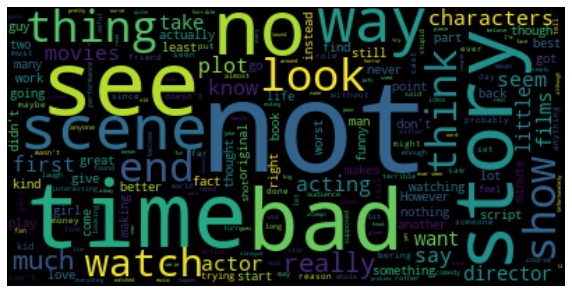

In [16]:
wordcloud_negative = WordCloud(stopwords=neg_list,max_words=200,min_font_size=4).generate(neg)

# Display the top words for negative reviews
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_negative,interpolation='bilinear')
plt.axis('off')

## Text Preprocessing

In [17]:
def clean_text(mess):
    nopunc = [c for c in mess if c not in string.punctuation] #removes the punctuation
    nopunc = ''.join(nopunc) 
    nostopwords = [word for word in word_tokenize(nopunc) if word.lower() not in stopwords.words('english')] #remove stopwords and perform tokenization
    word_cleaned = [word for word in nostopwords if word != 'br'] # remove the 'br' (because it is a html string)
    return word_cleaned

In [18]:
# Convert the string values into integers
text['sentiment'] = text['sentiment'].map({'negative':0,'positive':1})

## Train - Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(text['review'],text['sentiment'],test_size=0.2,random_state=101)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(40000,) (40000,) (10000,) (10000,)


## Train the model

I will create a pipeline for the training process

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

Let's create the pipeline, which will:
* Perform a TF-IDF vectorization on the preprocessed text and
* Create a Logistic Regression model

In [21]:
pipeline = Pipeline([
                ('tfidf',TfidfVectorizer(analyzer=clean_text)), # 'clean_text' is the custom-made function
                ('classification_model',LogisticRegression())
])

In [22]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x00000268A90528B0>)),
                ('classification_model', LogisticRegression())])

In [23]:
pred = pipeline.predict(x_test)

## Evaluate the model

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
pipeline.score(x_test,y_test)

0.9014

In [26]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[4426  533]
 [ 453 4588]]               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4959
           1       0.90      0.91      0.90      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



As we can see, the model has an overall accuracy of 90%